In [1]:
import os
import math
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
from tqdm import tqdm
import cv2
from PIL import Image

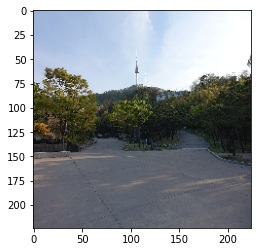

In [2]:
contents = cv2.imread('contents.jfif')
contents = cv2.resize(contents, (224, 224))
plt.imshow(cv2.cvtColor(contents, cv2.COLOR_BGR2RGB))

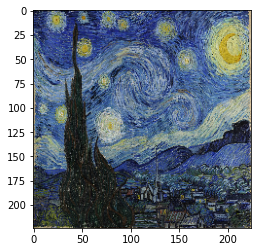

In [3]:
style = cv2.imread('style.jpg')
style = cv2.resize(style, (224, 224))
plt.imshow(cv2.cvtColor(style, cv2.COLOR_BGR2RGB))

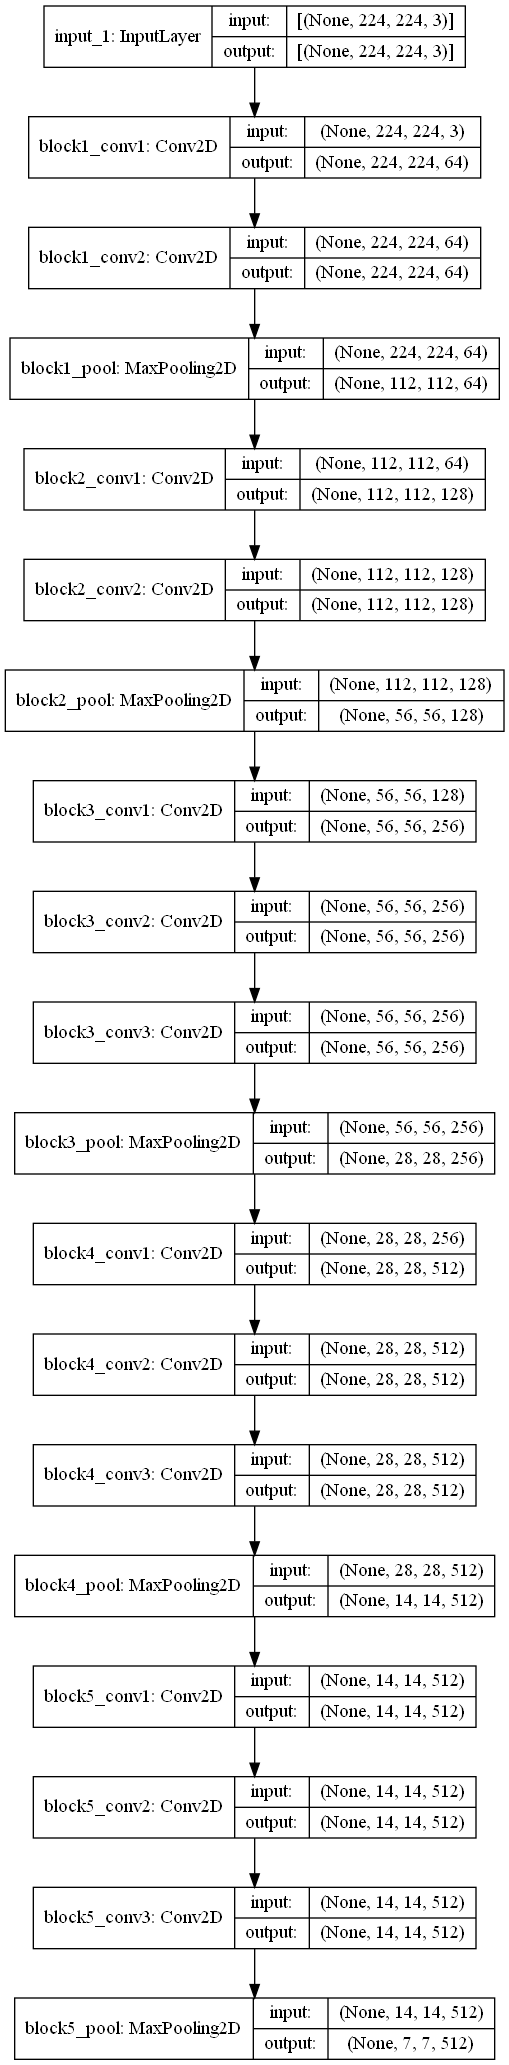

In [4]:
vgg_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), 
                                        include_top=False, 
                                        weights='imagenet')
vgg_model.trainable=False
tf.keras.utils.plot_model(vgg_model, show_shapes=True)

In [5]:
style_transfer_model = tf.keras.Model(inputs = [vgg_model.input], 
                                      outputs = [vgg_model.get_layer(name='block1_conv2').output, 
                                                 vgg_model.get_layer(name='block2_conv2').output, 
                                                 vgg_model.get_layer(name='block3_conv3').output, 
                                                 vgg_model.get_layer(name='block4_conv3').output])
style_transfer_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
style_true_b1c2, style_true_b2c2, style_true_b3c3, style_true_b4c3 = style_transfer_model.predict(np.reshape(style, (-1, 224, 224, 3)))
style_true_b1c2.shape

(1, 224, 224, 64)

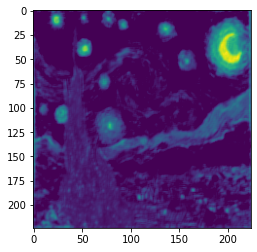

In [7]:
plt.imshow(style_true_b1c2[0][:, :, 60])

In [8]:
contents_true_b1c2, contents_true_b2c2, contents_true_b3c3, contents_true_b4c3 = style_transfer_model.predict(np.reshape(contents, (-1, 224, 224, 3)))
contents_true_b3c3.shape

(1, 56, 56, 256)

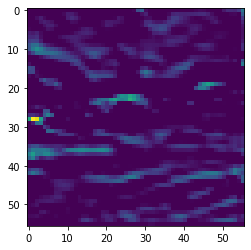

In [9]:
plt.imshow(contents_true_b3c3[0][:, :, 250])

In [10]:
def gram_matrix(x):
    reshape_x = tf.transpose(x, [2, 1, 0])
    s = tf.shape(reshape_x)
    reshape_x = tf.reshape(reshape_x, (s[0], s[1] * s[2]))
    reshape_x_t = tf.transpose(reshape_x)
    dot = tf.matmul(reshape_x, reshape_x_t)
    dot = tf.cast(dot, dtype='float32')
    dot = dot / tf.cast(tf.shape(reshape_x)[0], tf.float32) / tf.cast(tf.shape(reshape_x)[1], tf.float32)
    return dot

In [11]:
gram_matrix(contents_true_b3c3[0])

<tf.Tensor: shape=(256, 256), dtype=float32, numpy=
array([[671.06805  , 300.29123  ,  29.795645 , ...,  79.8843   ,
         32.292248 ,  33.502625 ],
       [300.29123  , 677.1283   ,  38.146954 , ...,  76.13212  ,
         61.753227 ,  23.60127  ],
       [ 29.795645 ,  38.146954 ,  61.719856 , ...,  18.556124 ,
          0.720388 ,   0.7690808],
       ...,
       [ 79.8843   ,  76.13212  ,  18.556124 , ..., 184.69687  ,
         18.261183 ,   1.3966694],
       [ 32.292248 ,  61.753227 ,   0.720388 , ...,  18.261183 ,
         94.52855  ,   5.901966 ],
       [ 33.502625 ,  23.60127  ,   0.7690808, ...,   1.3966694,
          5.901966 ,  25.228296 ]], dtype=float32)>

In [12]:
input_image = cv2.imread('contents.jfif')
input_image = cv2.resize(input_image, (224, 224))


1
s_loss tf.Tensor(1016689.9, shape=(), dtype=float32)
c_loss_3 tf.Tensor(0.0, shape=(), dtype=float32)

2
s_loss tf.Tensor(398309.16, shape=(), dtype=float32)
c_loss_3 tf.Tensor(79563.305, shape=(), dtype=float32)

3
s_loss tf.Tensor(279086.0, shape=(), dtype=float32)
c_loss_3 tf.Tensor(144611.11, shape=(), dtype=float32)

4
s_loss tf.Tensor(286959.94, shape=(), dtype=float32)
c_loss_3 tf.Tensor(109504.94, shape=(), dtype=float32)

5
s_loss tf.Tensor(211600.53, shape=(), dtype=float32)
c_loss_3 tf.Tensor(155222.62, shape=(), dtype=float32)

6
s_loss tf.Tensor(230343.72, shape=(), dtype=float32)
c_loss_3 tf.Tensor(122304.07, shape=(), dtype=float32)

7
s_loss tf.Tensor(184535.56, shape=(), dtype=float32)
c_loss_3 tf.Tensor(168591.88, shape=(), dtype=float32)

8
s_loss tf.Tensor(196273.8, shape=(), dtype=float32)
c_loss_3 tf.Tensor(126364.42, shape=(), dtype=float32)

9
s_loss tf.Tensor(143588.56, shape=(), dtype=float32)
c_loss_3 tf.Tensor(163998.62, shape=(), dtype=float32)

10
s_los

s_loss tf.Tensor(174295.22, shape=(), dtype=float32)
c_loss_3 tf.Tensor(228635.4, shape=(), dtype=float32)

78
s_loss tf.Tensor(32302.457, shape=(), dtype=float32)
c_loss_3 tf.Tensor(171883.16, shape=(), dtype=float32)

79
s_loss tf.Tensor(177634.25, shape=(), dtype=float32)
c_loss_3 tf.Tensor(233436.95, shape=(), dtype=float32)

80
s_loss tf.Tensor(31674.115, shape=(), dtype=float32)
c_loss_3 tf.Tensor(171686.45, shape=(), dtype=float32)

81
s_loss tf.Tensor(180125.4, shape=(), dtype=float32)
c_loss_3 tf.Tensor(237829.88, shape=(), dtype=float32)

82
s_loss tf.Tensor(31142.469, shape=(), dtype=float32)
c_loss_3 tf.Tensor(171758.95, shape=(), dtype=float32)

83
s_loss tf.Tensor(182751.19, shape=(), dtype=float32)
c_loss_3 tf.Tensor(240406.6, shape=(), dtype=float32)

84
s_loss tf.Tensor(30101.096, shape=(), dtype=float32)
c_loss_3 tf.Tensor(172746.81, shape=(), dtype=float32)

85
s_loss tf.Tensor(182545.11, shape=(), dtype=float32)
c_loss_3 tf.Tensor(244464.78, shape=(), dtype=float32)

s_loss tf.Tensor(21003.535, shape=(), dtype=float32)
c_loss_3 tf.Tensor(186462.39, shape=(), dtype=float32)

153
s_loss tf.Tensor(422217.7, shape=(), dtype=float32)
c_loss_3 tf.Tensor(317889.44, shape=(), dtype=float32)

154
s_loss tf.Tensor(18175.059, shape=(), dtype=float32)
c_loss_3 tf.Tensor(203701.48, shape=(), dtype=float32)

155
s_loss tf.Tensor(493622.84, shape=(), dtype=float32)
c_loss_3 tf.Tensor(257266.27, shape=(), dtype=float32)

156
s_loss tf.Tensor(20367.586, shape=(), dtype=float32)
c_loss_3 tf.Tensor(186909.67, shape=(), dtype=float32)

157
s_loss tf.Tensor(362115.8, shape=(), dtype=float32)
c_loss_3 tf.Tensor(349604.1, shape=(), dtype=float32)

158
s_loss tf.Tensor(34276.383, shape=(), dtype=float32)
c_loss_3 tf.Tensor(201964.11, shape=(), dtype=float32)

159
s_loss tf.Tensor(452896.62, shape=(), dtype=float32)
c_loss_3 tf.Tensor(265452.56, shape=(), dtype=float32)

160
s_loss tf.Tensor(27325.586, shape=(), dtype=float32)
c_loss_3 tf.Tensor(190710.88, shape=(), dtype=

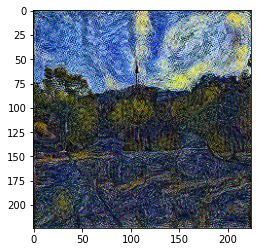

In [13]:
img_avi = np.zeros((224, 224, 3))
opt = tf.keras.optimizers.Adam(10.0)

fcc = cv2.VideoWriter_fourcc(* 'DIVX')
out = cv2.VideoWriter('style_transfer.avi', fcc, 10.0, (224, 224))

for epoch in range(200):
    input_image = tf.reshape(input_image, (-1, 224, 224, 3))
    input_image = tf.cast(input_image, dtype='float32')
    input_image = tf.Variable(input_image, dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        
        b1c2, b2c2, b3c3, b4c3 = style_transfer_model(input_image)
        
        s_loss_1 = tf.stop_gradient(gram_matrix(style_true_b1c2[0])) - gram_matrix(b1c2[0])
        s_loss_1 = tf.reduce_mean(tf.square(s_loss_1))
        s_loss_2 = tf.stop_gradient(gram_matrix(style_true_b2c2[0])) - gram_matrix(b2c2[0])
        s_loss_2 = tf.reduce_mean(tf.square(s_loss_2))
        s_loss_3 = tf.stop_gradient(gram_matrix(style_true_b3c3[0])) - gram_matrix(b3c3[0])
        s_loss_3 = tf.reduce_mean(tf.square(s_loss_3))
        s_loss_4 = tf.stop_gradient(gram_matrix(style_true_b4c3[0])) - gram_matrix(b4c3[0])
        s_loss_4 = tf.reduce_mean(tf.square(s_loss_4))
        
        c_loss_1 = contents_true_b1c2 - b1c2
        c_loss_1 = tf.reduce_mean(tf.square(c_loss_1))
        c_loss_2 = contents_true_b2c2 - b2c2
        c_loss_2 = tf.reduce_mean(tf.square(c_loss_2))
        c_loss_3 = contents_true_b3c3 - b3c3
        c_loss_3 = tf.reduce_mean(tf.square(c_loss_3))
        c_loss_4 = contents_true_b4c3 - b4c3
        c_loss_4 = tf.reduce_mean(tf.square(c_loss_4))
        
        s_loss = (s_loss_1 + s_loss_2 + s_loss_3 + s_loss_4)
        c_loss = (c_loss_1 + c_loss_2 + c_loss_3 + c_loss_4) / 4
        loss = s_loss * 10.0 + c_loss_3
        
        grad = tape.gradient(loss, input_image)
        opt.apply_gradients([(grad, input_image)])
        input_image = tf.cast(input_image, dtype=tf.int32)
        input_image = tf.clip_by_value(input_image, 0, 255)
        img_avi = input_image.numpy()[0]
        if((epoch + 0) % 10 == 0):
            cv2.imwrite('{}.jpg'.format(epoch), img_avi)
        out.write(np.uint8(img_avi))
        print()
        print(epoch+1)
        print('s_loss', s_loss)
        print('c_loss_3', c_loss_3)
    plt.imshow(input_image[0][:, :, :: -1])
    out.release()
    cv2.destroyAllWindows()

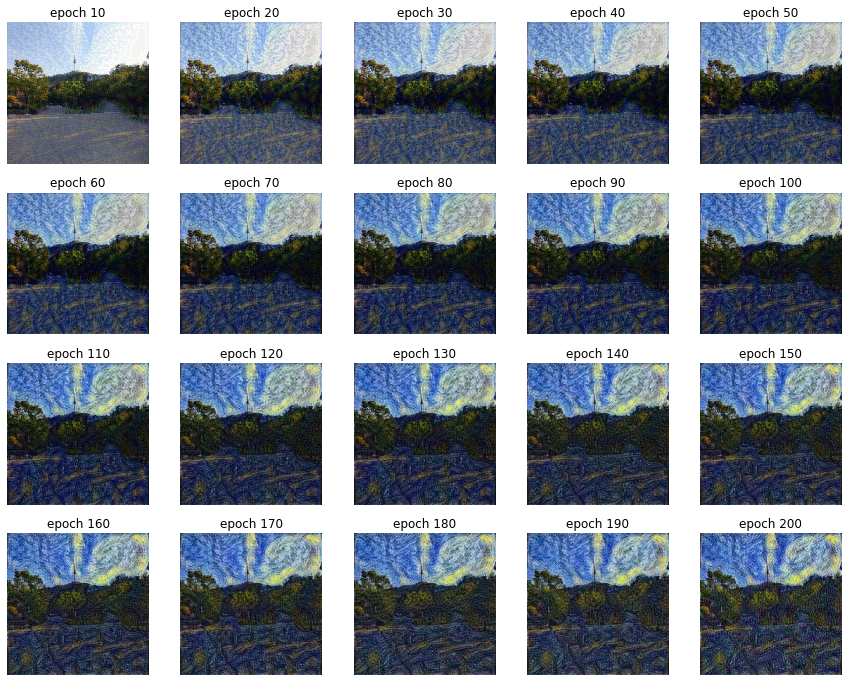

In [14]:
import matplotlib.pylab as plt 

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))
    
for i in range(20):
    ax = axes[i//5, i%5]
    img = plt.imread('{}.jpg'.format(i*10))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('epoch {}'.format(i*10+10))
        
plt.show()  